In [2]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np


In [3]:
data_path = '/workspaces/EWT/EWT4/DATA/ETW4.ods'
df_E_MCT1_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet11", skiprows=36)
df_E_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet4", skiprows=36)
df_E_MCT1_ilacco1_1 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet12", skiprows=36)
df_E_MCT1_ilacco1_2 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet15", skiprows=36)
df_E_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet16", skiprows=36)

In [4]:
E_MCT1_ilacco1_0 = dataframe1(df_E_MCT1_ilacco1_0,3,5,6,7)
E_MCT1_ilacco1_0_50μM_CCCP = dataframe1(df_E_MCT1_ilacco1_0_50μM_CCCP,3,8,9,10)
E_MCT1_ilacco1_1 = dataframe1(df_E_MCT1_ilacco1_1,3,5,6,7)
E_MCT1_ilacco1_2 = dataframe1(df_E_MCT1_ilacco1_2,3,5,6,7)
E_MCT1_ilacco1_1_50μM_CCCP = dataframe1(df_E_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)
print(E_MCT1_ilacco1_0)

     Time  1.Messung  2.Messung  3.Messung  Mittelwerte  Standardabweichung
0     0.0   0.000000   0.000000   0.000000     0.000000            0.000000
1    10.0  -0.021960  -0.034363  -0.047001    -0.034441            0.012521
2    20.0  -0.029753  -0.052886  -0.071809    -0.051483            0.021063
3    30.0  -0.026413  -0.064880  -0.088356    -0.059883            0.031272
4    40.0  -0.028862  -0.083380  -0.110180    -0.074141            0.041438
5    50.0  -0.034429  -0.094165  -0.131387    -0.086660            0.048913
6    60.0  -0.046870  -0.114744  -0.164332    -0.108649            0.058968
7    70.0  -0.055359  -0.122869  -0.181421    -0.119883            0.063084
8    80.0  -0.065574  -0.135516  -0.199965    -0.133685            0.067215
9    90.0  -0.067633  -0.144657  -0.216266    -0.142852            0.074333
10  100.0  -0.083582  -0.152371  -0.237645    -0.157866            0.077179
11  110.0  -0.096106  -0.166252  -0.259445    -0.173934            0.081940
12  120.0  -

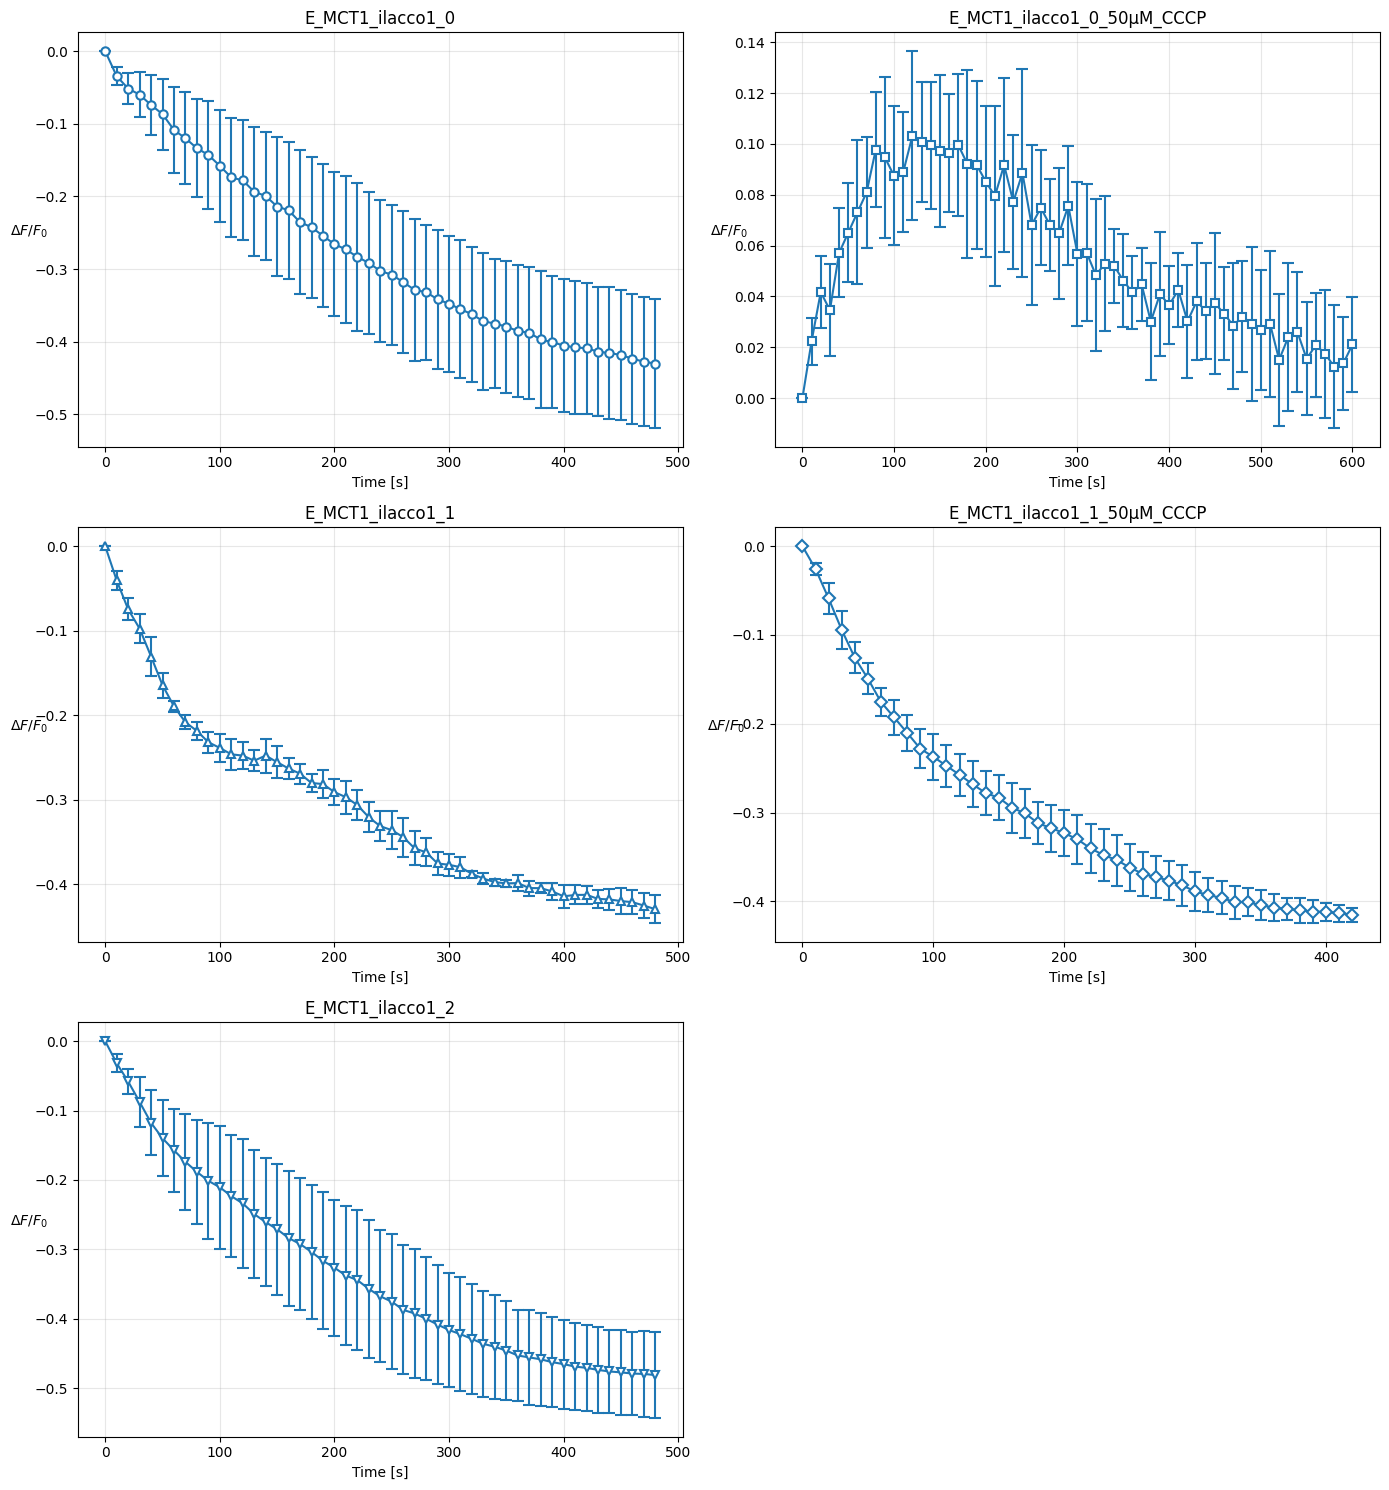

Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png
Saved combined Efflux subplot: ../figueres/Efflux_all_subplots.png


In [7]:
# Erstelle Subplots für alle `E_MCT1_ilacco1_*` DataFrames (verwende feste Spalten: 'Time','Mittelwerte','Standartabweichung')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_MCT1_ilacco1_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_MCT1_ilacco1_" gefunden.')

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

# Verschiedene Marker für jede Kurve
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Bestimme Grid-Größe
n = len(frames)
cols = 2
rows = (n + cols - 1) // cols if n>0 else 1
fig, axes = plt.subplots(rows, cols, figsize=(14, 5*rows))
if isinstance(axes, np.ndarray):
    axes = axes.flatten()
else:
    axes = [axes]

for ax in axes[n:]:
    ax.axis('off')

for i, ((name, df), ax) in enumerate(zip(frames, axes)):
    ax.clear()
    if df is None:
        ax.text(0.5, 0.5, f"{name} not found", ha='center', va='center')
        ax.set_title(name)
        continue

    # Erwartete Spalten: 'Time', 'Mittelwerte'
    if 'Time' not in df.columns or 'Mittelwerte' not in df.columns:
        ax.text(0.5, 0.5, "Erwartete Spalten 'Time' oder 'Mittelwerte' fehlen", ha='center', va='center')
        ax.set_title(name)
        print(f"{name}: Fehlende Spalten. Vorhandene Spalten: {df.columns.tolist()}")
        continue

    times = pd.to_numeric(df['Time'], errors='coerce')
    means = pd.to_numeric(df['Mittelwerte'], errors='coerce')

    # Std-Spalte: bevorzugt 'Standartabweichung', fallback auf 'Standardabweichung'
    if 'Standartabweichung' in df.columns:
        stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
    elif 'Standardabweichung' in df.columns:
        stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
    else:
        stds = np.zeros_like(means)

    mask = (~times.isna()) & (~means.isna())
    if mask.sum() == 0:
        ax.text(0.5, 0.5, 'Keine gültigen Daten zum Plotten', ha='center', va='center')
    marker = markers[i % len(markers)]
    ax.errorbar(times[mask], means[mask], yerr=stds[mask], 
                marker=marker, linestyle='-', capsize=4,
                markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'Efflux_all_subplots.png')

plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
plt.show()

print(f'Saved combined Efflux subplot: {outpath}')
print(f'Saved combined Efflux subplot: {outpath}')
plt.show()

Saved combined overlay plot: ../figueres/Efflux_combined_overlay.png


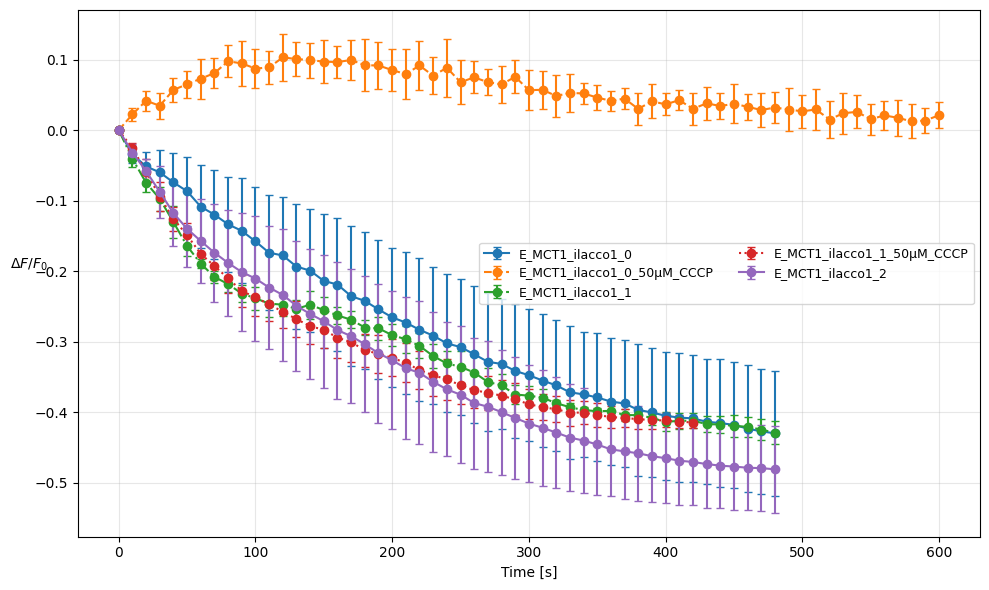

In [ ]:
# Kombiniere alle `E_MCT1_ilacco1_*` DataFrames in einem Overlay-Plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

markers = ['o', 's', '^', 'D', 'v', 'P', 'X']

# Sammle automatisch alle DataFrames, die mit dem Prefix beginnen
frames = []
for name in sorted(globals()):
    if name.startswith('E_MCT1_ilacco1_'):
        frames.append((name, globals().get(name)))

if len(frames) == 0:
    print('Keine DataFrames mit Prefix "E_MCT1_ilacco1_" gefunden.')

# Farben/linestyles
linestyles = ['-', '--', '-.', ':']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

os.makedirs(os.path.join('..', 'figueres'), exist_ok=True)

plt.figure(figsize=(10,6))
ax = plt.gca()
plotted = False

for idx, (name, df) in enumerate(frames):
    ls = linestyles[idx % len(linestyles)]
    color = colors[idx % len(colors)]
    if df is None:
        print(f"Variable {name} nicht gefunden — überspringe.")
        continue

    # Finde Time
    if 'Time' in df.columns:
        times = pd.to_numeric(df['Time'], errors='coerce')
    else:
        times = pd.to_numeric(df.iloc[:,0], errors='coerce')

    # Verwende generische 'Mittelwerte' Spalte
    if 'Mittelwerte' in df.columns:
        means = pd.to_numeric(df['Mittelwerte'], errors='coerce')
        if 'Standartabweichung' in df.columns:
            stds = pd.to_numeric(df['Standartabweichung'], errors='coerce')
        elif 'Standardabweichung' in df.columns:
            stds = pd.to_numeric(df['Standardabweichung'], errors='coerce')
        else:
            stds = np.zeros_like(means)

        mask = (~times.isna()) & (~means.isna())
        if mask.sum() == 0:
            continue
        ax.errorbar(times[mask], means[mask], yerr=stds[mask], fmt='o'+ls, color=color, label=name, capsize=3)
        plotted = True
    else:
        print(f"{name}: Spalte 'Mittelwerte' nicht gefunden, überspringe.")

if not plotted:
    print('Keine Daten geplottet (keine passenden Spalten).')
else:
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation = 0)
    ax.grid(alpha=0.3)
    ax.legend(ncol=2, fontsize=9)
    plt.tight_layout()
    outpath = os.path.join('..', 'figueres', 'Efflux_combined_overlay.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved combined overlay plot: {outpath}')
    plt.show()

Saved plot: ../figueres/E_MCT1_ilacco1_1_50μM_CCCP_plot.png


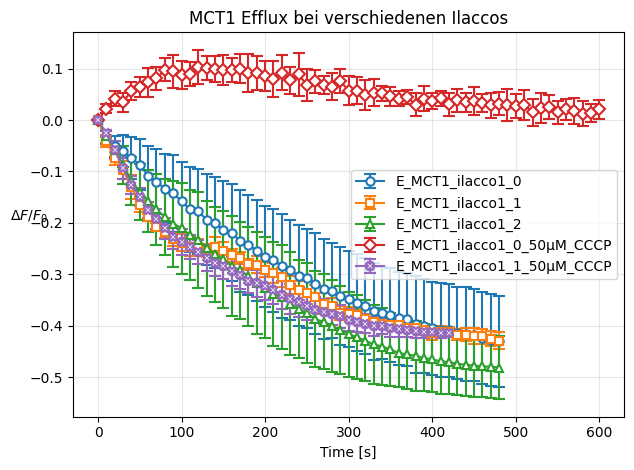

In [11]:
# verschiedene Ilaccos bei 10 mM Lactat Influx

data_frames = [
    ('E_MCT1_ilacco1_0','o', E_MCT1_ilacco1_0),
    ('E_MCT1_ilacco1_1', 's', E_MCT1_ilacco1_1),
    ('E_MCT1_ilacco1_2', '^', E_MCT1_ilacco1_2),
    ("E_MCT1_ilacco1_0_50μM_CCCP",'D', E_MCT1_ilacco1_0_50μM_CCCP),
    ("E_MCT1_ilacco1_1_50μM_CCCP","X", E_MCT1_ilacco1_1_50μM_CCCP)
]

for name,marker, df in data_frames:
    plt.errorbar(df["Time"], df["Mittelwerte"], yerr=df["Standardabweichung"], 
                    marker=marker, linestyle='-', label=name, capsize=4, 
                    markerfacecolor='white', markeredgewidth=1.5, markersize=6)
plotted_any = True

plt.xlabel('Time [s]')
plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
plt.title("MCT1 Efflux bei verschiedenen Ilaccos")
ax = plt.gca()
ax.yaxis.set_label_coords(-0.08, 0.5)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

outpath = os.path.join('..', 'figueres', f'{name}_plot.png')
#plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved plot: {outpath}')
plt.show()